In [376]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

In [231]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value

In [187]:
founding_fathers = ['john adams', 'benjamin franklin', 'alexander hamilton', 'john jay', 'thomas jefferson', 'james madison', 'george washington']

In [188]:
colnames = ['delegate name','First Name','Last Name','delegate_state','sign','Dollars_sum','Dollars_count','90th_sum','90th_count']

In [189]:
pre1790 = pd.read_csv('Producables/Delegate_Pre1790_Assets.csv')
pre1790.drop([0, 1], inplace = True)

In [190]:
pre1790.columns = pd.MultiIndex.from_tuples([("Identifier",'delegate name'), ("Identifier",'First Name'), ("Identifier",'Last Name'), ("Identifier",'delegate_state',), ("Identifier",'sign'),
     (  'Loan Office Certificates Face Value',   'sum'), (  'Loan Office Certificates Face Value', 'count'),
     ('Loan Office Certificates Specie Value',   'sum'),('Loan Office Certificates Specie Value', 'count'),
     ( 'State Certificates Dollars',   'sum'),( 'State Certificates Dollars', 'count'),
     (    'State Certificates 90th',   'sum'),(    'State Certificates 90th', 'count'),
     (          'Marine Certificates Dollars',   'sum'),(          'Marine Certificates Dollars', 'count'),
     (   'Marine Certificates 90th',   'sum'),(   'Marine Certificates 90th', 'count'),
     (  'Pierce Certificates Value',   'sum'),(  'Pierce Certificates Value', 'count')])

In [191]:
pre1790[("Identifier",'sign')] = pre1790[("Identifier",'sign')].apply(lambda x: x.lower())

In [192]:
#loan office certificates + state certificates
pre1790.loc[2, ('Identifier', "Last Name")] = "Fox"
pre1790.sort_values(('Identifier', "Last Name"), inplace = True)

In [193]:
pre1790[('Loan Office Certificates Specie Value', 'sum')] = pd.to_numeric(pre1790[('Loan Office Certificates Specie Value', 'sum')])
pre1790[('Loan Office Certificates Face Value', 'sum')] = pd.to_numeric(pre1790[('Loan Office Certificates Face Value', 'sum')])
pre1790[('Loan Office Certificates Specie Value', 'count')] = pd.to_numeric(pre1790[('Loan Office Certificates Specie Value', 'count')])
pre1790[('Loan Office Certificates Face Value', 'count')] = pd.to_numeric(pre1790[('Loan Office Certificates Face Value', 'count')])
pre1790[('Pierce Certificates Value', 'sum')] = pd.to_numeric(pre1790[('Pierce Certificates Value', 'sum')])

In [194]:
pre1790[('State Certificates Dollars', 'sum')] = pd.to_numeric(pre1790[('State Certificates Dollars', 'sum')]) + pre1790[('State Certificates 90th', 'sum')].apply(lambda x: np.float(x) if x != "22/8" else 22/8)//90
pre1790[('State Certificates 90th', 'sum')] = pre1790[('State Certificates 90th', 'sum')].apply(lambda x: np.float(x) if x != "22/8" else 22/8)%90

In [195]:
pre1790[('Marine Certificates Dollars', 'sum')] = pd.to_numeric(pre1790[('Marine Certificates Dollars', 'sum')]) + pre1790[('Marine Certificates 90th', 'sum')].apply(lambda x: np.float(x))//90
pre1790[('Marine Certificates 90th', 'sum')] = pre1790[('Marine Certificates 90th', 'sum')].apply(lambda x: np.float(x))%90

In [196]:
#Clean pre1790 Certificates
#Create total assets for each type of certificate
#Create cumulative total assets

#Analysis
#->Top delegates for each asset class
#->Top delegates who voted yes/no
#->Delegates with no assets - what was their vote
#->proportion of state delegates who voted yes vs. total debt held by state
#->Use McGuire data to look at the fraction of a delegates total money that’s in debt certificates
#->Regression of vote on assets

#Famous delegates and their money

In [197]:
#Top delegates for each asset class
#loan office - specie, face value
#state - value
#marine - value
#pierce - value

In [198]:
default_cols = [("Identifier",'delegate name'), ("Identifier",'First Name'), 
        ("Identifier",'Last Name'), ("Identifier",'delegate_state',), ("Identifier",'sign')]

In [327]:
cols = default_cols.copy()
cols.extend([('Loan Office Certificates Specie Value', 'sum'), ('Loan Office Certificates Specie Value', 'count')])
pre1790.sort_values(('Loan Office Certificates Specie Value', 'sum'), ascending = False)[cols].head(10).to_csv('Results/top_loanoffice_specie.csv')
pre1790.sort_values(('Loan Office Certificates Specie Value', 'sum'), ascending = False)[cols].head(10)

Identifier                                            \
           delegate name First Name  Last Name delegate_state sign   
1081       Robert Morris     Robert     Morris   Constitution  yes   
1200    William Phillips    William   Phillips             MA  yes   
1570  Jeremiah Wadsworth   Jeremiah  Wadsworth             CT  yes   
1402       William Smith    William      Smith             SC  yes   
1441        John Stevens       John    Stevens             NJ  yes   
887         John Langdon       John    Langdon   Constitution  yes   
815           Brown John      Brown       John             RI  yes   
186           John Brown       John      Brown             NC   no   
1071       William Moore    William      Moore             DE  yes   
610       Samuel Griffin     Samuel    Griffin             NH  yes   

     Loan Office Certificates Specie Value         
                                       sum  count  
1081                          67275.167290  309.0  
1200                          44598.938830  170.0  
1570                          35498.529780  369.0  
1402                          29479.097220  381.0  
1441                          27727.495403  344.0  
887                           26977.611680  112.0  
815                           26084.570880   58.0  
186                           26084.570880   58.0  
1071                          24908.048600   90.0  
610                           24838.711250   41.0

In [329]:
#Top delegates for each asset class
cols = default_cols.copy()
cols.extend([('Loan Office Certificates Face Value', 'sum'), ('Loan Office Certificates Face Value', 'count')])
pre1790.sort_values(('Loan Office Certificates Face Value', 'sum'), ascending = False)[cols].head(10).to_csv('Results/top_loanoffice_facevalue.csv')
pre1790.sort_values(('Loan Office Certificates Face Value', 'sum'), ascending = False)[cols].head(10)

Identifier                                            \
           delegate name First Name  Last Name delegate_state sign   
1081       Robert Morris     Robert     Morris   Constitution  yes   
1441        John Stevens       John    Stevens             NJ  yes   
1570  Jeremiah Wadsworth   Jeremiah  Wadsworth             CT  yes   
1402       William Smith    William      Smith             SC  yes   
304       Robert Coleman     Robert    Coleman             PA  yes   
1377        John Skinner       John    Skinner             NC  yes   
378           John Davis       John      Davis             MA  yes   
812           Davis John      Davis       John             RI  yes   
433          John Dunlap       John     Dunlap             MA  yes   
813        Williams John   Williams       John             RI   no   

     Loan Office Certificates Face Value         
                                     sum  count  
1081                            405700.0  309.0  
1441                            399300.0  344.0  
1570                            303300.0  369.0  
1402                            212200.0  381.0  
304                             206200.0  306.0  
1377                            203400.0  313.0  
378                             134900.0  196.0  
812                             134200.0  194.0  
433                             112100.0   72.0  
813                             107800.0  176.0

In [330]:
#Top delegates for each asset class
cols = default_cols.copy()
cols.extend([('State Certificates Dollars', 'sum'), ('State Certificates Dollars', 'count')])
pre1790.sort_values([('State Certificates Dollars', 'sum'), ('State Certificates 90th', 'sum')], ascending = False)[cols].head(10).to_csv('Results/top_statecerts.csv')
pre1790.sort_values([('State Certificates Dollars', 'sum'), ('State Certificates 90th', 'sum')], ascending = False)[cols].head(10)

Identifier                                              \
             delegate name  First Name   Last Name delegate_state sign   
464         William Elliot     William      Elliot             SC  yes   
392          David Deshler       David     Deshler             PA  yes   
931   Robert R. Livingston   Robert R.  Livingston             NY  yes   
213         William Butler     William      Butler             SC   no   
554         Elbridge Gerry    Elbridge       Gerry   Constitution   no   
1517        James Thompson       James    Thompson             NC   no   
1080          James Morris       James      Morris             PA  yes   
182          William Brown     William       Brown             PA   no   
546         Thomas Gaskins      Thomas     Gaskins             VA  yes   
486     John Jacob Faesch   John Jacob     Faesch              NJ  yes   

     State Certificates Dollars         
                            sum  count  
464                     57320.0    5.0  
392                     15581.0   11.0  
931                     10721.0    6.0  
213                     10622.0    1.0  
554                     10100.0    1.0  
1517                     8486.0   18.0  
1080                     8163.0    4.0  
182                      7957.0  132.0  
546                      7200.0    1.0  
486                      6273.0    7.0

In [331]:
#Top delegates for each asset class
cols = default_cols.copy()
cols.extend([('Marine Certificates Dollars', 'sum'), ('Marine Certificates Dollars', 'count')])
pre1790.sort_values([('Marine Certificates Dollars', 'sum'), ('Marine Certificates 90th', 'sum')], ascending = False)[cols].head(10).to_csv('Results/top_marinecerts.csv')
pre1790.sort_values([('Marine Certificates Dollars', 'sum'), ('Marine Certificates 90th', 'sum')], ascending = False)[cols].head(10)

Identifier                                           \
        delegate name First Name Last Name delegate_state sign   
839     William Jones    William     Jones             MA   no   
743     George Houser     George    Houser             NC  yes   
1402    William Smith    William     Smith             SC  yes   
1083   William Morris    William    Morris             MD  yes   
766       John Hunter       John    Hunter             SC  yes   
186        John Brown       John     Brown             NC   no   
815        Brown John      Brown      John             RI  yes   
465       John Elliot       John    Elliot             GA  yes   
192   Benjamin Browne   Benjamin    Browne             MA  yes   
100        David Bell      David      Bell             VA   no   

     Marine Certificates Dollars        
                             sum count  
839                       1872.0   5.0  
743                       1047.0   1.0  
1402                       636.0   1.0  
1083                       471.0   3.0  
766                        310.0   1.0  
186                        262.0   1.0  
815                        262.0   1.0  
465                        194.0   1.0  
192                        141.0   1.0  
100                        108.0   1.0

In [332]:
#Top delegates for each asset class
cols = default_cols.copy()
cols.extend([('Pierce Certificates Value', 'sum'), ('Pierce Certificates Value', 'count')])
pre1790.sort_values([('Pierce Certificates Value', 'sum')], ascending = False)[cols].head(10).to_csv('Results/top_piercecerts.csv')
pre1790.sort_values([('Pierce Certificates Value', 'sum')], ascending = False)[cols].head(10)

Identifier                                           \
          delegate name First Name Last Name delegate_state sign   
1411         John Smith       John     Smith             NY  yes   
1404      John K. Smith    John K.     Smith             MA  yes   
1333      William Scott    William     Scott             SC  yes   
1090   William Moultrie    William  Moultrie             SC  yes   
1402      William Smith    William     Smith             SC  yes   
691       William Heath    William     Heath             MA  yes   
1606      Anthony Wayne    Anthony     Wayne             PA  yes   
812          Davis John      Davis      John             RI  yes   
378          John Davis       John     Davis             MA  yes   
1152  Samuel H. Parsons  Samuel H.   Parsons             CT  yes   

     Pierce Certificates Value         
                           sum  count  
1411                  29545.90  241.0  
1404                  25384.62  207.0  
1333                  15801.36   50.0  
1090                  14423.60    6.0  
1402                  14004.65  102.0  
691                   13436.74   10.0  
1606                  11902.63    8.0  
812                   11639.91   69.0  
378                   11639.91   69.0  
1152                  10840.64   14.0

In [204]:
#total assets, and total assets for those who voted yes/no

In [205]:
pre1790[('Total Debt Assets', 'sum')] = pre1790[('Loan Office Certificates Face Value', 'sum')] + pre1790[('State Certificates Dollars', 'sum')] + pre1790[('State Certificates 90th', 'sum')]

In [333]:
cols = default_cols.copy()
cols.extend([('Loan Office Certificates Face Value', 'sum'), ('State Certificates Dollars', 'sum'), ('State Certificates 90th', 'sum'), ('Total Debt Assets', 'sum')])
pre1790.sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10).to_csv('Results/top_debtholders.csv')
pre1790.sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10)

Identifier                                            \
           delegate name First Name  Last Name delegate_state sign   
1081       Robert Morris     Robert     Morris   Constitution  yes   
1441        John Stevens       John    Stevens             NJ  yes   
1570  Jeremiah Wadsworth   Jeremiah  Wadsworth             CT  yes   
1402       William Smith    William      Smith             SC  yes   
304       Robert Coleman     Robert    Coleman             PA  yes   
1377        John Skinner       John    Skinner             NC  yes   
378           John Davis       John      Davis             MA  yes   
812           Davis John      Davis       John             RI  yes   
433          John Dunlap       John     Dunlap             MA  yes   
813        Williams John   Williams       John             RI   no   

     Loan Office Certificates Face Value State Certificates Dollars  \
                                     sum                        sum   
1081                            405700.0                     1053.0   
1441                            399300.0                     3463.0   
1570                            303300.0                       22.0   
1402                            212200.0                     5927.0   
304                             206200.0                        0.0   
1377                            203400.0                       15.0   
378                             134900.0                     2171.0   
812                             134200.0                     2171.0   
433                             112100.0                     1135.0   
813                             107800.0                     1772.0   

     State Certificates 90th Total Debt Assets  
                         sum               sum  
1081                    37.0          406790.0  
1441                    49.0          402812.0  
1570                    45.0          303367.0  
1402                    49.0          218176.0  
304                      0.0          206200.0  
1377                    45.0          203460.0  
378                     62.0          137133.0  
812                     62.0          136433.0  
433                     74.0          113309.0  
813                     39.0          109611.0

In [334]:
cols = default_cols.copy()
cols.extend([('Loan Office Certificates Face Value', 'sum'), ('State Certificates Dollars', 'sum'), ('State Certificates 90th', 'sum'), ('Total Debt Assets', 'sum')])
pre1790[pre1790[('Identifier', 'sign')].apply(lambda x: x == 'yes')].sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10).to_csv('Results/top_debtholders_votedyes.csv')
pre1790[pre1790[('Identifier', 'sign')].apply(lambda x: x == 'yes')].sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10)

Identifier                                            \
           delegate name First Name  Last Name delegate_state sign   
1081       Robert Morris     Robert     Morris   Constitution  yes   
1441        John Stevens       John    Stevens             NJ  yes   
1570  Jeremiah Wadsworth   Jeremiah  Wadsworth             CT  yes   
1402       William Smith    William      Smith             SC  yes   
304       Robert Coleman     Robert    Coleman             PA  yes   
1377        John Skinner       John    Skinner             NC  yes   
378           John Davis       John      Davis             MA  yes   
812           Davis John      Davis       John             RI  yes   
433          John Dunlap       John     Dunlap             MA  yes   
1674       John Williams       John   Williams             VA  yes   

     Loan Office Certificates Face Value State Certificates Dollars  \
                                     sum                        sum   
1081                            405700.0                     1053.0   
1441                            399300.0                     3463.0   
1570                            303300.0                       22.0   
1402                            212200.0                     5927.0   
304                             206200.0                        0.0   
1377                            203400.0                       15.0   
378                             134900.0                     2171.0   
812                             134200.0                     2171.0   
433                             112100.0                     1135.0   
1674                            107500.0                     1772.0   

     State Certificates 90th Total Debt Assets  
                         sum               sum  
1081                    37.0          406790.0  
1441                    49.0          402812.0  
1570                    45.0          303367.0  
1402                    49.0          218176.0  
304                      0.0          206200.0  
1377                    45.0          203460.0  
378                     62.0          137133.0  
812                     62.0          136433.0  
433                     74.0          113309.0  
1674                    39.0          109311.0

In [335]:
cols = default_cols.copy()
cols.extend([('Loan Office Certificates Face Value', 'sum'), ('State Certificates Dollars', 'sum'), ('State Certificates 90th', 'sum'), ('Total Debt Assets', 'sum')])
pre1790[pre1790[('Identifier', 'sign')].apply(lambda x: x == 'no')].sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10).to_csv('Results/top_debtholders_votedno.csv')
pre1790[pre1790[('Identifier', 'sign')].apply(lambda x: x == 'no')].sort_values(('Total Debt Assets', 'sum'), ascending = False)[cols].head(10)

Identifier                                           \
         delegate name First Name Last Name delegate_state sign   
813      Williams John   Williams      John             RI   no   
1517    James Thompson      James  Thompson             NC   no   
554     Elbridge Gerry   Elbridge     Gerry   Constitution   no   
188       Thomas Brown     Thomas     Brown             NC   no   
641      John Hamilton       John  Hamilton             MA   no   
839      William Jones    William     Jones             MA   no   
1510  William Thompson    William  Thompson             MA   no   
186         John Brown       John     Brown             NC   no   
260       Thomas Chase     Thomas     Chase             NH   no   
1489       John Taylor       John    Taylor             MA   no   

     Loan Office Certificates Face Value State Certificates Dollars  \
                                     sum                        sum   
813                             107800.0                     1772.0   
1517                             96400.0                     8486.0   
554                              76500.0                    10100.0   
188                              74500.0                     1209.0   
641                              55300.0                      103.0   
839                              43100.0                     1161.0   
1510                             39800.0                     1364.0   
186                              35600.0                     1208.0   
260                              30500.0                     1440.0   
1489                             28500.0                     3109.0   

     State Certificates 90th Total Debt Assets  
                         sum               sum  
813                     39.0          109611.0  
1517                    40.0          104926.0  
554                      0.0           86600.0  
188                      9.0           75718.0  
641                      3.0           55406.0  
839                     18.0           44279.0  
1510                    12.0           41176.0  
186                     19.0           36827.0  
260                      0.0           31940.0  
1489                    50.0           31659.0

In [336]:
print("Delegates with 0 debt assets")
print(pre1790[pre1790[('Total Debt Assets', 'sum')].apply(lambda x: x == 0)][('Identifier', 'sign')].value_counts())
print("Delegates with debt assets")
print(pre1790[pre1790[('Total Debt Assets', 'sum')].apply(lambda x: x != 0)][('Identifier', 'sign')].value_counts())

Delegates with 0 debt assets
yes             677
no              394
did not vote     16
Name: (Identifier, sign), dtype: int64
Delegates with debt assets
yes             447
no              197
did not vote     13
Name: (Identifier, sign), dtype: int64


In [341]:
# integer encode
label_encoder = LabelEncoder()
values = pre1790[pre1790[('Total Debt Assets', 'sum')].apply(lambda x: x == 0)][('Identifier', 'sign')]
total_debt_assets = label_encoder.fit_transform(values)

values = pre1790[pre1790[('Total Debt Assets', 'sum')].apply(lambda x: x != 0)][('Identifier', 'sign')]
all_delegates = label_encoder.fit_transform(values)
results = mann_whitney_u_test(list(total_debt_assets), list(all_delegates))
print("The U value of the mann_whitney_u_test between the two distributions is {} and the p value is {}".format(results[0], results[1]))

The U value of the mann_whitney_u_test between the two distributions is 337514.5 and the p value is 0.010566986268574571


In [342]:
pre1790[('Total Assets', 'sum')] = pre1790[('Loan Office Certificates Face Value', 'sum')] + pre1790[('State Certificates Dollars', 'sum')] + pre1790[('State Certificates 90th', 'sum')] +  pre1790[('Marine Certificates Dollars', 'sum')] +  pre1790[('Marine Certificates 90th', 'sum')] +  pre1790[('Pierce Certificates Value', 'sum')] 

In [343]:
print("Delegates with 0 assets")
print(pre1790[pre1790[('Total Assets', 'sum')].apply(lambda x: x == 0)][('Identifier', 'sign')].value_counts())
print("Delegates with assets")
print(pre1790[pre1790[('Total Assets', 'sum')].apply(lambda x: x != 0)][('Identifier', 'sign')].value_counts())

Delegates with 0 assets
yes             569
no              322
did not vote     15
Name: (Identifier, sign), dtype: int64
Delegates with assets
yes             555
no              269
did not vote     14
Name: (Identifier, sign), dtype: int64


In [344]:
# integer encode
label_encoder = LabelEncoder()
values = pre1790[pre1790[('Total Assets', 'sum')].apply(lambda x: x == 0)][('Identifier', 'sign')]
total_debt_assets = label_encoder.fit_transform(values)

values = pre1790[pre1790[('Total Assets', 'sum')].apply(lambda x: x != 0)][('Identifier', 'sign')]
all_delegates = label_encoder.fit_transform(values)

results = mann_whitney_u_test(list(total_debt_assets), list(all_delegates))
print("The U value of the mann_whitney_u_test between the two distributions is {} and the p value is {}".format(results[0], results[1]))

The U value of the mann_whitney_u_test between the two distributions is 366846.5 and the p value is 0.07225628333333022


In [345]:
#famous people

In [346]:
pre1790[pre1790[('Identifier', 'delegate name')].apply(lambda x: x.lower() in founding_fathers)]

Identifier                                             \
           delegate name First Name   Last Name delegate_state sign   
524    Benjamin Franklin   Benjamin    Franklin   Constitution  yes   
638   Alexander Hamilton  Alexander    Hamilton   Constitution  yes   
640   Alexander Hamilton  Alexander    Hamilton             NY  yes   
800             John Jay       John         Jay             NY  yes   
1592   George Washington     George  Washington   Constitution  yes   

     Loan Office Certificates Face Value        \
                                     sum count   
524                               8100.0  27.0   
638                                  0.0   0.0   
640                                  0.0   0.0   
800                               8900.0  15.0   
1592                             82000.0  21.0   

     Loan Office Certificates Specie Value       State Certificates Dollars  \
                                       sum count                        sum   
524                             8100.00000  27.0                        0.0   
638                                0.00000   0.0                      160.0   
640                                0.00000   0.0                        0.0   
800                             8719.35420  15.0                        1.0   
1592                            4746.21646  21.0                        0.0   

      ... State Certificates 90th       Marine Certificates Dollars        \
      ...                     sum count                         sum count   
524   ...                    0.00   0.0                         0.0   0.0   
638   ...                    0.00   0.0                         0.0   0.0   
640   ...                    0.00   0.0                         0.0   0.0   
800   ...                    2.75   1.0                         0.0   0.0   
1592  ...                    0.00   0.0                         0.0   0.0   

     Marine Certificates 90th       Pierce Certificates Value        \
                          sum count                       sum count   
524                       0.0   0.0                       0.0   0.0   
638                       0.0   0.0                       0.0   0.0   
640                       0.0   0.0                       0.0   0.0   
800                       0.0   0.0                       0.0   0.0   
1592                      0.0   0.0                       0.0   0.0   

     Total Debt Assets Total Assets  
                   sum          sum  
524            8100.00      8100.00  
638             160.00       160.00  
640               0.00         0.00  
800            8903.75      8903.75  
1592          82000.00     82000.00  

[5 rows x 21 columns]

In [347]:
state_assets = dict()

In [348]:
#state debt
CT_CD = pd.read_excel("Data/Post1790/CT/CT_post1790_CD_ledger.xlsx", header = 13, usecols = 'H, I, N, O, X, Y, AD, AE, AN, AO, AT, AU')
CT_CD.columns = ['First Name', 'Last Name', '6p_Dollar', '6p_Cents', 'First Name.1', 'Last Name.1', '6p_def_Dollar', '6p_def_Cents',
                  'First Name.2', 'Last Name.2', '3p_Dollar', '3p_Cents']
CT_states = CT_CD[CT_CD['First Name'].apply(lambda x: not pd.isnull(x) and 'state' in x.lower())]
state_assets['CT'] = np.sum(CT_states['6p_Dollar'] + CT_states['6p_Cents']/100 + CT_states['6p_def_Dollar'] + CT_states['6p_def_Cents']/100 + CT_states['3p_Dollar'] + CT_states['3p_Cents']/100)

#prepare loan dataset
NH_CD = pd.read_excel("Data/Post1790/NH/T652_R6_New_Hampshire_CD.xlsx", header = 10, usecols = 'I, J, N, O, P, Q, R, S')
NH_CD.columns = ['First Name', 'Last Name', '6p_Dollar', '6p_Cents',  '6p_def_Dollar', '6p_def_Cents', '3p_Dollar', '3p_Cents']
NH_states = NH_CD[NH_CD['First Name'].apply(lambda x: not pd.isnull(x) and 'state' in x.lower())]
state_assets['NH'] = np.sum(NH_states['6p_Dollar'] + NH_states['6p_Cents']/100 + NH_states['6p_def_Dollar'] + NH_states['6p_def_Cents']/100 + NH_states['3p_Dollar'] + NH_states['3p_Cents']/100)

SC_CD = pd.read_excel("Data/Post1790/SC/Post_1790_South_Carolina_CD.xlsx", header = 11, usecols = 'D, E, M, N, S, T, AB, AC, AH, AI, AQ, AR')
SC_CD.columns = ['First Name', 'Last Name', '6p_Dollar', '6p_Cents', 'First Name.1', 'Last Name.1', '6p_def_Dollar', '6p_def_Cents',
                  'First Name.2', 'Last Name.2', '3p_Dollar', '3p_Cents']
SC_states = SC_CD[SC_CD['First Name'].apply(lambda x: not pd.isnull(x) and 'state' in x.lower())]
state_assets['SC'] = np.sum(SC_states['6p_Dollar'] + SC_states['6p_Cents']/100 + SC_states['6p_def_Dollar'] + SC_states['6p_def_Cents']/100 + SC_states['3p_Dollar'] + SC_states['3p_Cents']/100)

GA_CD = pd.read_excel("Data/Post1790/GA/T694_GA_Loan_Office_CD.xlsx", header = 10, usecols = 'Q, R, Z, AA, AB, AC, AD, AE')
GA_CD.columns = ['First Name', 'Last Name', '6p_Dollar', '6p_Cents',  '6p_def_Dollar', '6p_def_Cents', '3p_Dollar', '3p_Cents']
GA_states = GA_CD[GA_CD['First Name'].apply(lambda x: not pd.isnull(x) and 'state' in x.lower())]
state_assets['GA'] = np.sum(GA_states['6p_Dollar'] + GA_states['6p_Cents']/100 + GA_states['6p_def_Dollar'] + GA_states['6p_def_Cents']/100 + GA_states['3p_Dollar'] + GA_states['3p_Cents']/100)

NJ_CD = pd.read_excel("Data/Post1790/NJ/NJ_3_percent_stock_T698_R1_R2.xlsx", header = 10, usecols = 'D, E, L, M')
NJ_CD.columns = ['First Name', 'Last Name', '3p_Dollar', '3p_Cents']
NJ_states = NJ_CD[NJ_CD['First Name'].apply(lambda x: not pd.isnull(x) and 'state' in x.lower())]
state_assets['NJ'] = np.sum(NJ_states['3p_Dollar'] + NJ_states['3p_Cents'].apply(lambda x: 0 if pd.isnull(x) else x)/100)

In [307]:
print(pre1790[pre1790[('Identifier','delegate_state')].apply(lambda x: x in ['CT', 'NH', 'SC', 'GA', 'NJ'])].groupby(('Identifier', 'delegate_state')).apply(lambda x: np.mean(x[('Identifier', 'sign')] == 'yes')))
print(state_assets)

(Identifier, delegate_state)
CT    0.757396
GA    1.000000
NH    0.513514
NJ    0.974359
SC    0.666667
dtype: float64
{'CT': 742945.2000000001, 'NH': 137786.41, 'SC': 1447173.6, 'GA': 2728.1721449999995, 'NJ': 19949.08}


Points from left to right are CT, GA, NH, NJ, SC


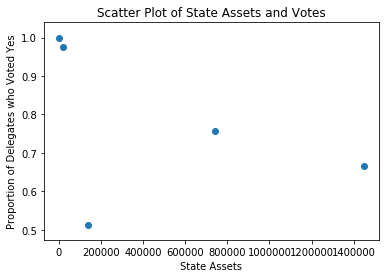

In [351]:
plt.scatter([742945.2000000001, 2728.1721449999995, 137786.41, 19949.08, 1447173.6],
           [0.757396, 1.000000, 0.513514, 0.974359, 0.666667])
plt.xlabel("State Assets")
plt.ylabel("Proportion of Delegates who Voted Yes")
plt.title("Scatter Plot of State Assets and Votes")
print("Points from left to right are CT, GA, NH, NJ, SC")

In [470]:
x = np.array(pre1790[('Total Debt Assets', 'sum')].tolist()).reshape(-1, 1)
y = pre1790[('Identifier', 'sign')].apply(lambda x: 1. if x == 'yes' else 0)
model = sm.Logit(y, x)
classifier = model.fit()

Optimization terminated successfully.
         Current function value: 0.685219
         Iterations 6


Vote = Debt_Assets*2.3720207068226288e-05
Vote is encoded as a binary variable, 1 = yes and 0 is anything else (no, didn't vote)
                             Logit Regression Results                             
Dep. Variable:     ('Identifier', 'sign')   No. Observations:                 1744
Model:                              Logit   Df Residuals:                     1743
Method:                               MLE   Df Model:                            0
Date:                    Sun, 15 Aug 2021   Pseudo R-squ.:                -0.05291
Time:                            17:10:14   Log-Likelihood:                -1195.0
converged:                           True   LL-Null:                       -1135.0
Covariance Type:                nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.372e-05   6.22e-06      3.812      

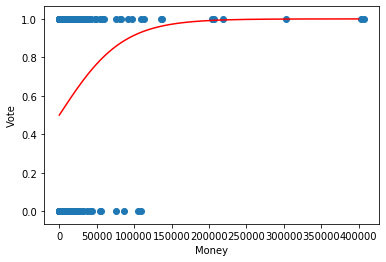

In [471]:
#matplotlib scatter funcion w/ logistic regression
pred_input = np.linspace(0,400000,1000000)
predictions = classifier.predict(pred_input)
plt.scatter(x,y)
plt.plot(pred_input, predictions, c = 'red')
plt.xlabel("Money")
plt.ylabel("Vote")
print("Vote = Debt_Assets*{}".format(classifier.params.values[0]))
print("Vote is encoded as a binary variable, 1 = yes and 0 is anything else (no, didn't vote)")
print(classifier.summary())

In [472]:
x = np.array(pre1790[('Total Assets', 'sum')].tolist()).reshape(-1, 1)
y = pre1790[('Identifier', 'sign')].apply(lambda x: 1. if x == 'yes' else 0)
model = sm.Logit(y, x)
classifier = model.fit()

Optimization terminated successfully.
         Current function value: 0.683897
         Iterations 6


Vote = All_Assets*2.472769187582562e-05
Vote is encoded as a binary variable, 1 = yes and 0 is anything else (no, didn't vote)
                             Logit Regression Results                             
Dep. Variable:     ('Identifier', 'sign')   No. Observations:                 1744
Model:                              Logit   Df Residuals:                     1743
Method:                               MLE   Df Model:                            0
Date:                    Sun, 15 Aug 2021   Pseudo R-squ.:                -0.05088
Time:                            17:10:14   Log-Likelihood:                -1192.7
converged:                           True   LL-Null:                       -1135.0
Covariance Type:                nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.473e-05   5.92e-06      4.179      0.

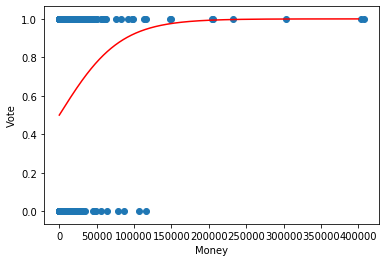

In [473]:
#matplotlib scatter funcion w/ logistic regression
pred_input = np.linspace(0,400000,1000000)
predictions = classifier.predict(pred_input)
plt.scatter(x,y)
plt.plot(pred_input, predictions, c = 'red')
plt.xlabel("Money")
plt.ylabel("Vote")
print("Vote = All_Assets*{}".format(classifier.params.values[0]))
print("Vote is encoded as a binary variable, 1 = yes and 0 is anything else (no, didn't vote)")
print(classifier.summary())